In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

### Importing the data

In [45]:
#reading the data
df = pd.read_csv("cema_internship_task_2023.csv", index_col=0)
df.head()

,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
period,,,,,,,,,,
Jan-23,Baringo County,3659,8.0,471.0,34.0,380.0,2620,85,739.0,731.0
Jan-23,Bomet County,1580,NaN,1.0,3.0,NaN,1984,41,86.0,16.0
Jan-23,Bungoma County,6590,24.0,98.0,154.0,23.0,4576,231,315.0,120.0
Jan-23,Busia County,7564,NaN,396.0,143.0,111.0,2239,251,608.0,125.0
Jan-23,Elgeyo Marakwet County,1407,NaN,92.0,71.0,5.0,2739,57,104.0,21.0


In [46]:
df.tail()

,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
period,,,,,,,,,,
Dec-21,Kitui County,29802,1.0,226.0,119.0,115.0,2214,182,744.0,245.0
Dec-21,Kisumu County,5431,26.0,101.0,60.0,72.0,3494,190,440.0,106.0
Dec-21,Kisii County,2040,NaN,40.0,42.0,7.0,2471,71,97.0,41.0
Dec-21,Wajir County,13522,432.0,66.0,1.0,206.0,3922,83,484.0,656.0
Dec-21,West Pokot County,6970,22.0,5.0,57.0,12.0,2477,38,87.0,28.0


### Data Understanding

In [47]:
df.columns

Index(['county', 'Total Dewormed', 'Acute Malnutrition', 'stunted 6-23 months',
       'stunted 0-<6 months', 'stunted 24-59 months', 'diarrhoea cases',
       'Underweight 0-<6 months', 'Underweight 6-23 months',
       'Underweight 24-59 Months'],
      dtype='object')

In [48]:
df.shape

(1410, 10)

In [49]:
#sum of missing values
df.isnull().sum()

county                        0
Total Dewormed                0
Acute Malnutrition          355
stunted 6-23 months          11
stunted 0-<6 months          19
stunted 24-59 months         14
diarrhoea cases               0
Underweight 0-<6 months       0
Underweight 6-23 months       0
Underweight 24-59 Months      0
dtype: int64

In [50]:
df["Acute Malnutrition"].mean()

125.4

In [57]:
df["Acute Malnutrition"].median()

22.0

In [52]:
df.duplicated().sum()

0

### Data cleaning

In [59]:
#filling the Acute malnutrition with Mode
df["Acute Malnutrition"].fillna(value=22, inplace=True)

In [60]:
df.isnull().sum()

county                      0
Total Dewormed              0
Acute Malnutrition          0
stunted 6-23 months         0
stunted 0-<6 months         0
stunted 24-59 months        0
diarrhoea cases             0
Underweight 0-<6 months     0
Underweight 6-23 months     0
Underweight 24-59 Months    0
dtype: int64

In [61]:
#dropping all other missing values
df.dropna(inplace=True)

In [62]:
df.isnull().sum()

county                      0
Total Dewormed              0
Acute Malnutrition          0
stunted 6-23 months         0
stunted 0-<6 months         0
stunted 24-59 months        0
diarrhoea cases             0
Underweight 0-<6 months     0
Underweight 6-23 months     0
Underweight 24-59 Months    0
dtype: int64

### Outliers

In [75]:
numerical_columns = df.drop(columns="county", axis=1)

In [76]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
    axes = axes.flatten()  # Convert axes array to 1D

    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
       
        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
       # print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.tight_layout()
    plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

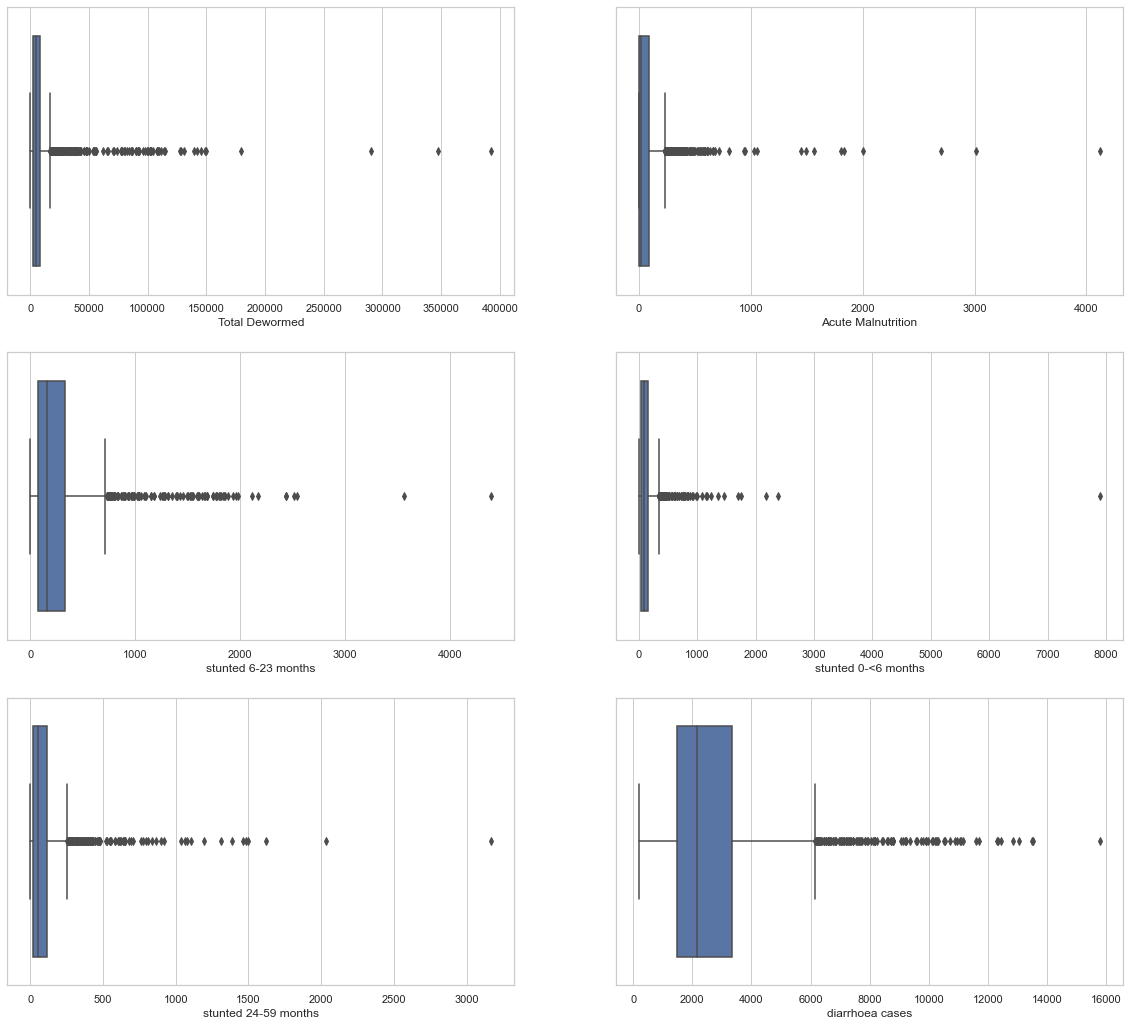

In [77]:
check_outliers(df, numerical_columns)

### EDA

#### Numerical Columns

c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

IndexError: index 6 is out of bounds for axis 0 with size 6

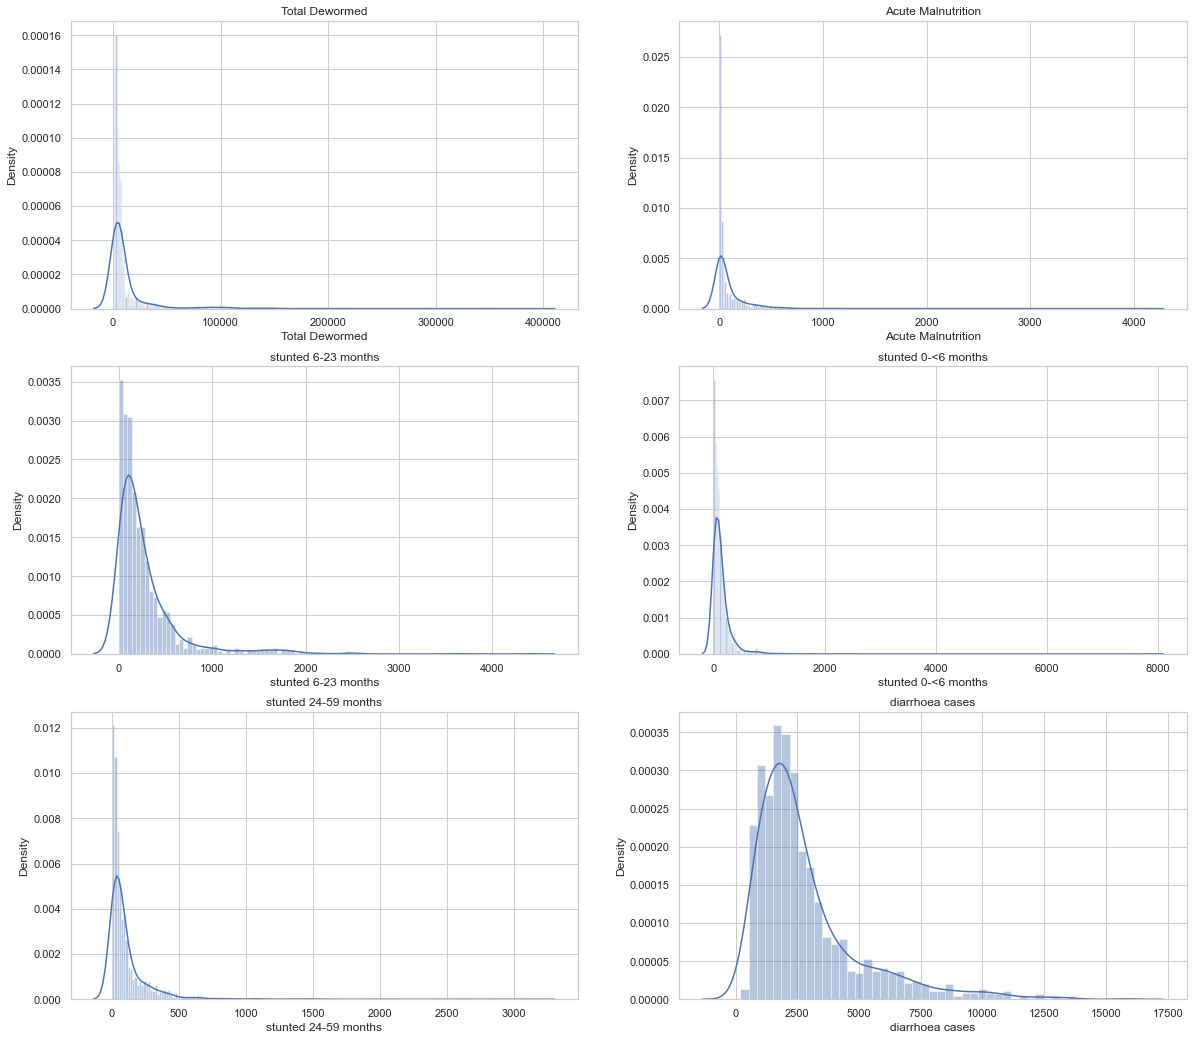

In [79]:
fig, axes = plt.subplots(3,2, figsize = (20,18))
ax =axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.distplot(numerical_columns[col], ax=ax[i], bins="auto")
    ax[i].set_title(col)

fig.tight_layout()
plt.show();

### What are the top 10 leading counties with diarrhoea cases 

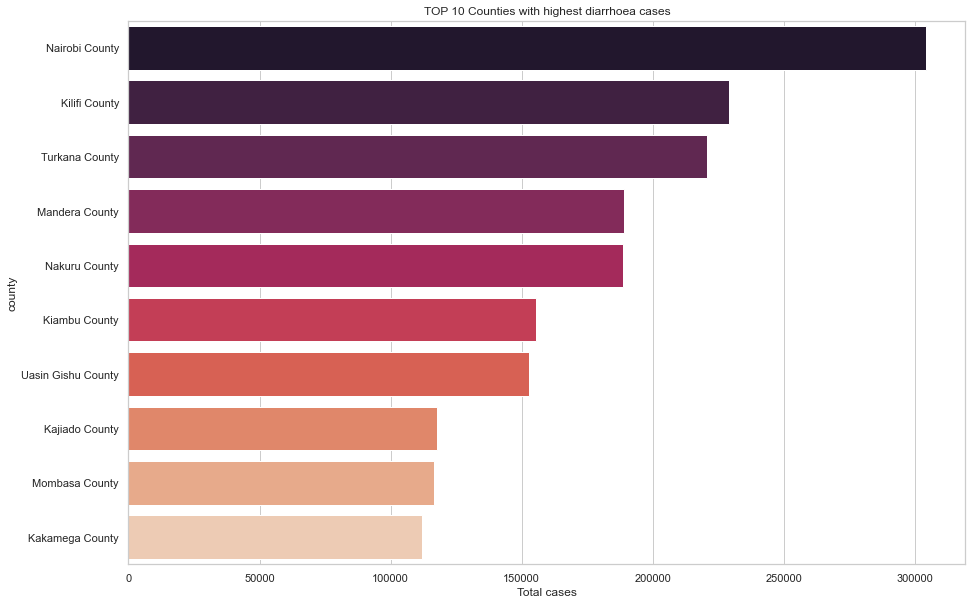

In [83]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
diarrhoea_top = df.groupby(["county"]).sum(numeric_only=True)["diarrhoea cases"].sort_values(ascending=False).head(10)
sns.barplot(data=diarrhoea_top.reset_index(), x="diarrhoea cases", y="county", ax=ax1, palette="rocket")
ax1.set_title("TOP 10 Counties with highest diarrhoea cases")
ax1.set_xlabel("Total cases")
plt.show()

### What are the top 10 counties with very low dewormation

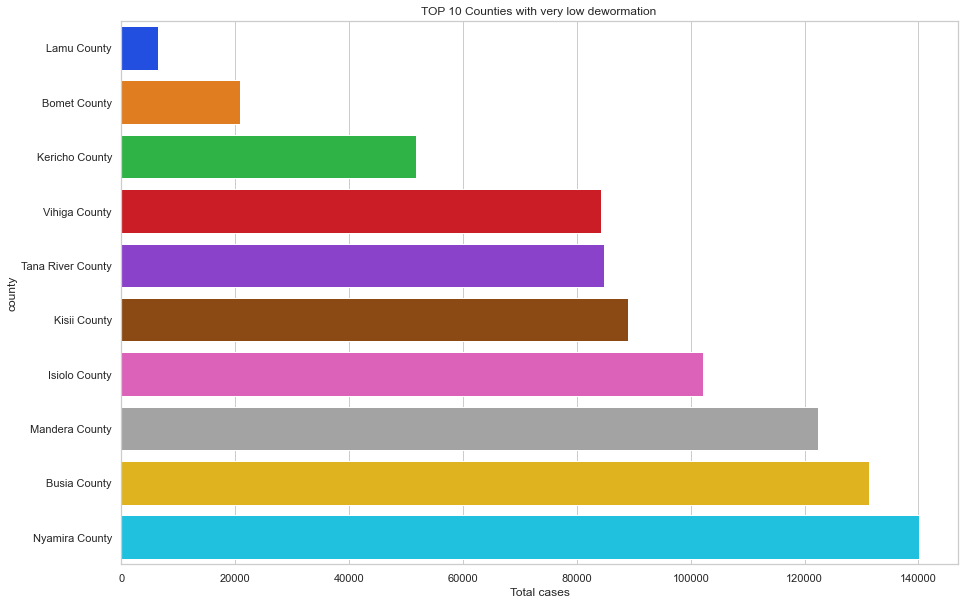

In [87]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
deworm_low = df.groupby(["county"]).sum(numeric_only=True)["Total Dewormed"].sort_values(ascending=True).head(10)
sns.barplot(data=deworm_low.reset_index(), x="Total Dewormed", y="county", ax=ax1, palette="bright")
ax1.set_title("TOP 10 Counties with very low dewormation ")
ax1.set_xlabel("Total cases")
plt.show()

### What are the top 10 countries with high malnutrition

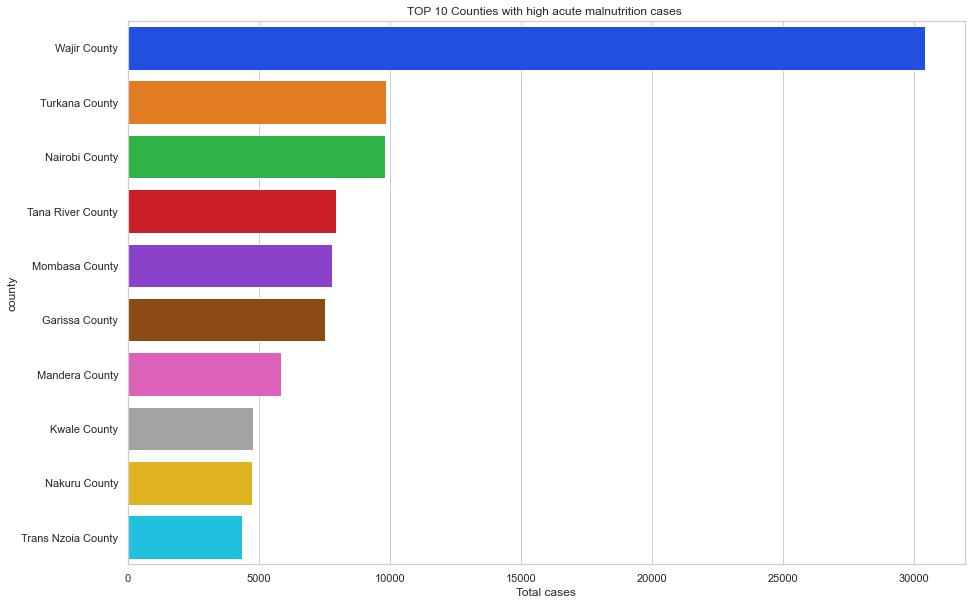

In [88]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
deworm_low = df.groupby(["county"]).sum(numeric_only=True)["Acute Malnutrition"].sort_values(ascending=False).head(10)
sns.barplot(data=deworm_low.reset_index(), x="Acute Malnutrition", y="county", ax=ax1, palette="bright")
ax1.set_title("TOP 10 Counties with high acute malnutrition cases ")
ax1.set_xlabel("Total cases")
plt.show()

### Statistical analysis of Research Question

H0 : Acute Malnutrition leads to Diarrhoea cases

H1: Acute Malnutrition Does not lead to Diarrhoea cases

In [90]:
correlation , p_value = stats.pearsonr(df["Acute Malnutrition"], df["diarrhoea cases"])
print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: 0.26444101435666284
P-value: 1.8922763355451344e-23


From the pearson correlation we can Conclude there is a weak positive correlation between acute malnutrition and diarrhoea cases

From the above , we have a p value that is less than 0.05. We therefore fail to reject the Null hypothesis and conclude acute malnutrition leads to diarrhoea cases